# EDA on Netflix Data  

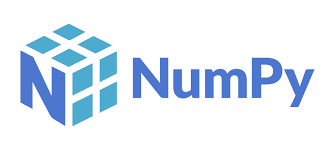

# NumPy 

NumPy (or Numpy) is a Linear Algebra Library for Python, the reason it is so important for Data Science with Python is that almost all of the libraries in the PyData Ecosystem rely on NumPy as one of their main building blocks.

Numpy is also incredibly fast, as it has bindings to C libraries. For more info on why you would want to use Arrays instead of lists, check out this great [StackOverflow post](http://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists).

We will only learn the basics of NumPy, to get started we need to install it!

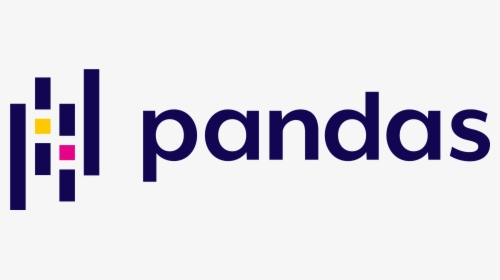

# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations

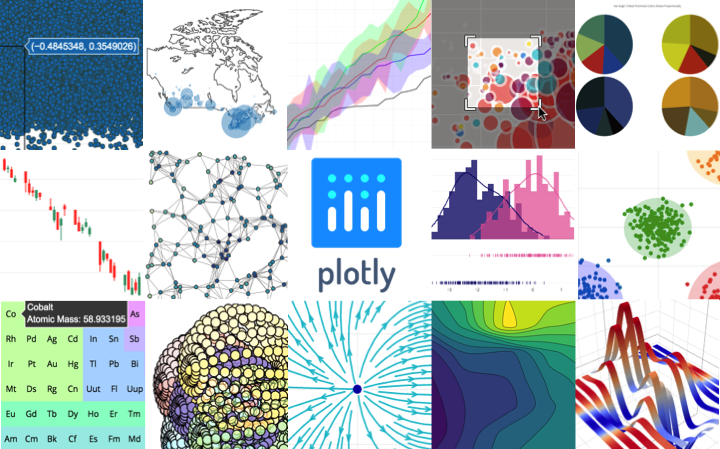

## plotly

plotly.py is an interactive, open-source, and browser-based graphing library for Python ✨

Built on top of plotly.js, plotly.py is a high-level, declarative charting library. plotly.js ships with over 30 chart types, including scientific charts, 3D graphs, statistical charts, SVG maps, financial charts, and more.

plotly.py is MIT Licensed. Plotly graphs can be viewed in Jupyter notebooks, standalone HTML files, or hosted online using Chart Studio Cloud.

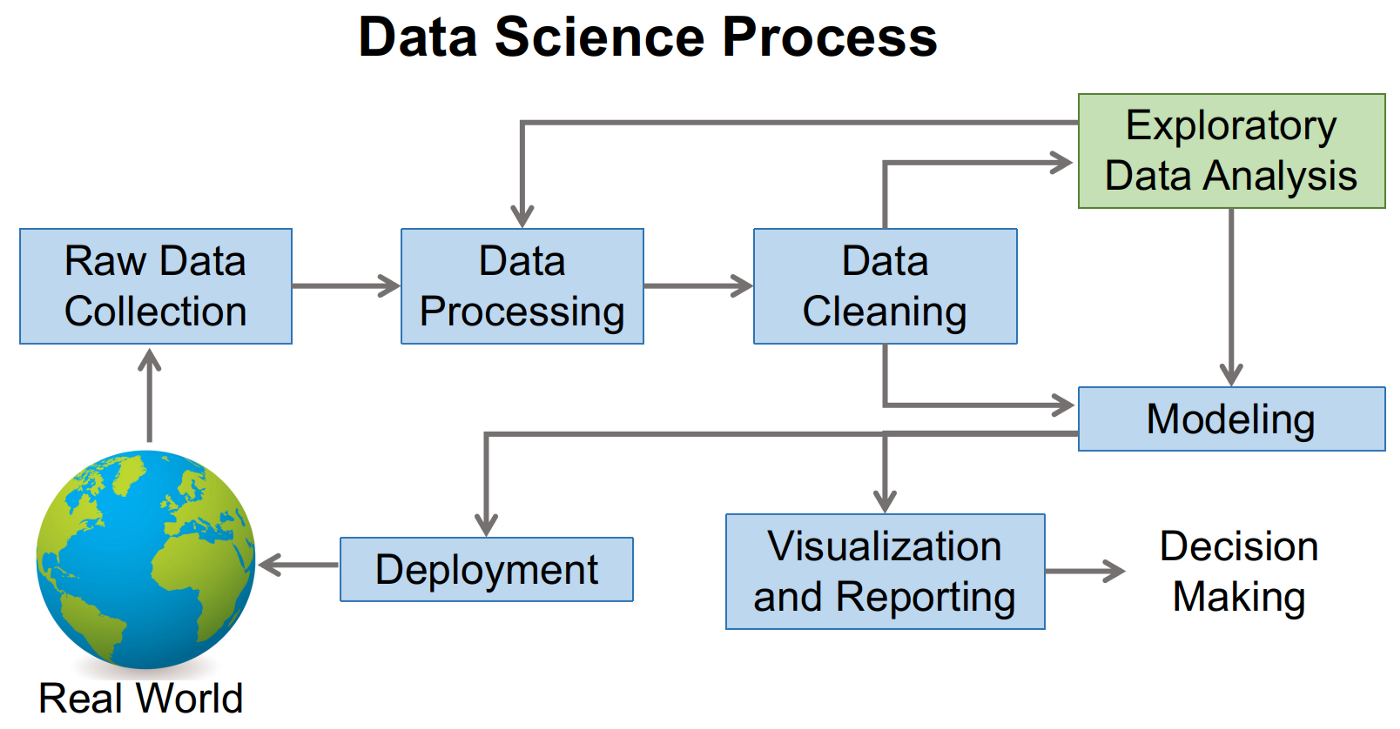

## Netflix Data Analysis with Python

The dataset I  have used for the Netflix data analytics task consists of TV shows and movies streamed on Netflix as of 2021. The dataset is provided by Flixable which is an engine of third-party research available on Netflix.

### Dataset Link : https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import numpy as np # linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis

dff=pd.read_csv('netflix_titles.csv')
dff.shape

(8807, 12)

In [2]:
dff

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [3]:
dff.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Distribution of Content:

To begin the task of analyzing Netflix data, I’ll start by looking at the distribution of content ratings on Netflix:

In [4]:
dff.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [5]:
z = dff.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix')
pieChart.show()

In [6]:
z

rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3

The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

## Top 5 Actors and Directors:
Now let’s see the top 5 successful directors on this platform:

In [7]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
filtered_directors

Director
0    0        Kirsten Johnson
1    0  No Director Specified
2    0        Julien Leclercq
3    0  No Director Specified
4    0  No Director Specified
...                       ...
8802 0          David Fincher
8803 0  No Director Specified
8804 0        Ruben Fleischer
8805 0           Peter Hewitt
8806 0            Mozez Singh

[9612 rows x 1 columns]

In [8]:
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5

Director  Total Content
4021  Rajiv Chilaka             22
4068    Raúl Campos             18
261       Jan Suter             18
4652    Suhas Kadav             16
3235   Marcus Raboy             16

In [9]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

From the above graph it is derived that the top 5 directors on this platform are:

- Raul Campos
- Jan Suter
- Jay Karas
- Marcus Raboy
- Jay Chapman

Now let’s have a look at the top 5 successful actors on this platform

## The top 5 successful actors

In [10]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
actorsTop5

Actor  Total Content
23624            Om Puri             27
15541      Julie Tejwani             28
30303   Takahiro Sakurai             30
26941       Rupa Bhimani             31
2612         Anupam Kher             39

From the above plot, it is derived that the top 5 actors on Netflix are:

- Anupam Kher
- Om Puri
- Shah Rukh Khan
- Takahira Sakurai
- Boman Irani

## Analyzing Content on Netflix:

The next thing to analyze from this data is the trend of production over the years on Netflix:

In [11]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
df2

Release Year     type  Total Content
95           2010    Movie            154
96           2010  TV Show             40
97           2011    Movie            145
98           2011  TV Show             40
99           2012    Movie            173
100          2012  TV Show             64
101          2013    Movie            225
102          2013  TV Show             63
103          2014    Movie            264
104          2014  TV Show             88
105          2015    Movie            398
106          2015  TV Show            162
107          2016    Movie            658
108          2016  TV Show            244
109          2017    Movie            767
110          2017  TV Show            265
111          2018    Movie            767
112          2018  TV Show            380
113          2019    Movie            633
114          2019  TV Show            397
115          2020    Movie            517
116          2020  TV Show            436
117          2021    Movie            277
118          2021  TV Show            315

In [12]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

The above line graph shows that there has been a decline in the production of the content for both movies and other shows since 2018.

At last, to conclude our analysis, I will analyze the sentiment of content on Netflix:

# TextBlob

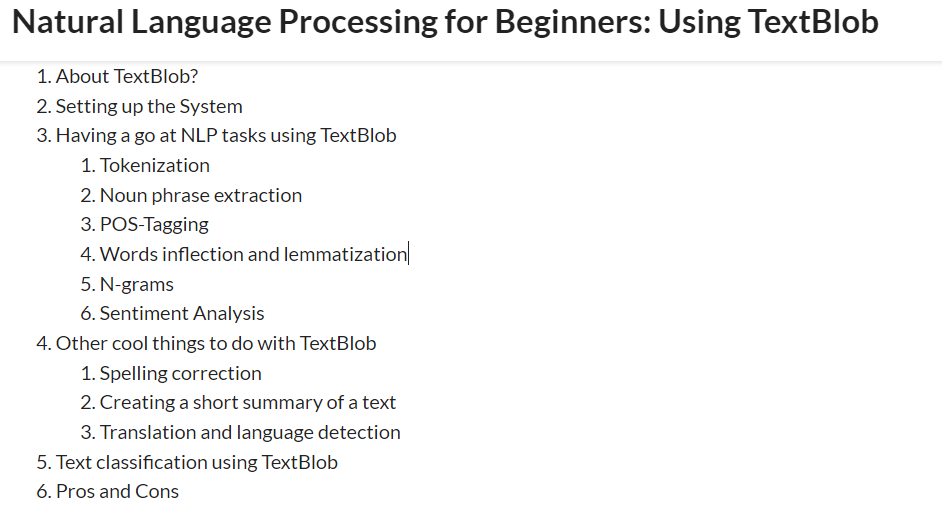

## About TextBlob?

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. 

A good thing about TextBlob is that they are just like python strings. So, you can transform and play with it same like we did in python. Below, I have shown you below some basic tasks. Don’t worry about the syntax, it is just to give you an intuition about how much-related TextBlob is to Python strings.

## 6 - Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

Let’s check the sentiment of our blob.

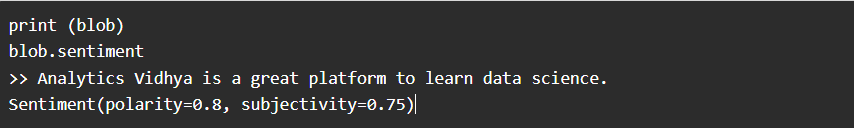

We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a public opinion and not a factual information.

## Sentiment Analysis

In [13]:
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity

    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]

fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.

##  Hope you Liked the Session - Thanks For Watching !!!